# Policy Gradient Method


## What are Policy Gradient Methods?
---
Policy gradient methods are a __subclass__ of **policy-based** methods.
   - It estimate the weights of an optimal policy through **gradient ascent**.(Unlike hill climbing)

Let's take an example to better understand **Policy Gradient Ascent** and example is teaching an agent to cross a busy road.
* Possible actions - `UP,DOWN,LEFT,RIGHT`
* So we can represent the policy in terms of neural network and input is state space and ourput is the probability for each possible action.
* If we're training our nn with raw-pixels then CNN is the best bet.
* Our goal is to find the weights of the neural network that yield the optimal policy.

### Working -- outline
* So, for instance, say the agent plays the game for a single round or episode and ends up making it to the other side safely and within the time limit.
* But then, when it plays the game for another episode, it chooses an uwise series of actions that leads to it losing the round.
### Reward system
* We'll give it a rewards of +1 if it crosses the road otherwise -1. And it's only delivered at the end of the game.

## The Big Picture 
---
Before digging into the details of policy gradient methods, we'll discuss how they work at high level.

```
LOOP:
 Collect an episode.
 Change the weights of the policy network:
     if WON, increase the probability of each (state,action) combination.
     if LOST,decrease the probability of each (state,action) combination


```
### Summary
1. For each episode, if the agent won the game, we'll amend the policy network weights to make each (state,action) pair that appeared in the episode to make them more **likely** to **Repeat** in future episode.
2. For each episode, if the agent lost the game, we'll change the policy network weights to make it **less likely** to **repeat** the corresponding (state,action) pairs in future. 

## Connections to Supervised Learning
---
Policy gradient methods are very similar to supervised learning.

#### Important Difference between Policy Gradient and Supervised Learning
* One important difference is that when we do image classification(supervised learning).Typically we work with dataset that __doesn't change over time.__(means for a image when we are training the __label will be same__ every time when ever we're passing it through neural network ulike **Policy Gradient** (Reinforcement Learning)
* However, in the reinforcement learning setting. The dataset varies by episode.
* So we use the policy to collect an episode, that give us a Dataset or a bunch of matched state action pairs and then we use that data set once to do a batch of updates.
* After these updates are done we discard the datasets and then collect new set data(another episode).
* So dataset is changing continuously, it's highly likely that we will experience a situation where the dataset has multiple conflicting opinions about what the best output should be for an input, or in other words, what the best action is to take from a game state.

* __It like a same image appears in supervised learning with different labels.__

* So this does make our current situation more complex.




# Problem Setup
---
We're now ready to get started with rigorously defining how policy gradient mehtods will work.


### Trajectory
* The first thing we need to define is a __Trajectory__.
    * __Trajectory__ = state-action sequence
    * $s_0,a_0,r_1,s_1,a_1,r_2,s_2,a_2,r_3,s_3,...$
* But actually, a Trajectory is a little bit more **flexible** because there are no __restriction on its length__.
* So, it can correspond to a full episode or just a small part of an episode.
* We denote **trajactory** length with $H$, where $H$ stands for **Horizon** and denote trajactory with $\tau$.
* Then, the sum reward from that Trajectory is written as $R(\tau)$.
* Our goal in this lesson is the same as in the previous lesson.
* We want to find the weights $\theta$ of neural network that maximize expected return.
* One way of accomplishing this is by setting the weights of the neural network so that on average, the agent experience trajectories that yield high return.
* We denote the expected return by $U$ and it is a function of $\theta$
* We want to find the value of $\theta$ that maximizes $U$.
### Expected Return
>$U(\theta) = \sum_{\tau}P(\tau;\theta)R(\tau)$
    * $R(\tau)$: Return corresponding to an arbitrary Trajectory tab.
    * Now to take return and calculate expected return we need to calculate Probability
    * $P(\tau;\theta)$: probability of trajectory $\tau$(it depends on policy, hence $\theta$)
    
## Important Note 
---
>$U(\theta) = \sum_{\tau}P(\tau;\theta)R(\tau)$

To see how it corresponds to the **expected return**, note that we've expressed the **return** $R(\tau)$ as a function of the trajectory $\tau$. Then, we calculate the weighted average (*where the weights are given by $P(\tau;\theta)$*)of all possible values that the return $R(\tau)$ can take.

### Why Trajectories?
---
We may be wondering: why are we using *trajectories* instead of episodes?The answer is that maximizing expected return over trajectories (instead of episodes) lets us search for optimal policies for both episodic and continuing task!

That said, for many episodic tasks, it often makes sense to just use the full episode. In particular, for the case of the video game example described in the lessons, reward is only derivative at the end of the episode. In this case, in order to estimate the expected return, trajectory should correspond to full episode; otherwise, we don't have enough reward information to meaningfully estimate the expected return.



# REINFORCE 

We've learned that our goal is to find the values of the weights $\theta$ in the neural network that maximize the expected return $U$.
>$U(\theta)= \sum_{\tau}P(\tau;\theta)R(\tau)$

<br>wher $\tau$ is an arbitrary trajectory. One way to determine the value of $\theta$ that maximizes this function is through **gradient ascent**. This algorithm is closely related to **gradient descent**, where the difference are that:
   - gradient descent is designed to find the **minimum** of a function, whereas gradient ascent will find the **maximum**, and
   - gradient descent steps in the direction of the **negative gradient**, whereas gradient ascent steps in the direction of the **gradient**.
##### Our update step for Gradient ascent
>$\theta \gets \theta + \alpha \delta_{\theta} U(\theta)$
* $\alpha\ $: is the step size that is generally allowed to decay over time. 
* Once we know how to calculate or estimate this gradient, we can repeatedly apply this update step, in the hopes that $\theta$ converges to the value that maximizes $U(\theta)$

* As we've learned, we can express the expected return as a probability weighted sum, where we take into account the probability of each possible trajectory and, the return permits trajectory.
* GOAL: find $\theta$ maximizes the expected return.
* One way to do that is by Gradient Ascent, where we iteratively take small steps in the direction of the gradient.
    * __Gradient Descent__ -- minimizes the function:
        * $\theta \gets \theta - \alpha \delta_{\theta} U(\theta)$
    * __Gradient Ascent__ -- maximizes the function:
        * $\theta \gets \theta + \alpha \delta_{\theta} U(\theta)$
* To apply above mentioned methods we need to calculate the gradient.
* __Now, we won't be able to calculate the exact value of the GRADIENT since that is computationally too expensive.__
    * It's computationally expensive __because__ in order to calculate the gradient exactly, we'll have to consider every possible trajectory.
* To calculate the gradient $\delta_{\theta}U(\theta)$, we have to consider every possible trajectory.
* To **estimate** the gradient $\delta_{\theta}U(\theta)$, we have to consider a **few trajectories**.


* Specifically, we'll use the policy to collect end trajectories.
* Use the policy $\pi_{\theta}$ to collect trajectories $\tau^{(1)}, \tau^{(2)},.....,\tau^{(m)}$.
* Remember, any trajectory is just the sequence of states and action and we'll use this notationtot refer to ith tajectory.
    * $\tau^{(i)} = (s_{0}^{(i)},a_{0}^{(i)},s_{1}^{(i)},a_{1}^{(i)},...., a_{H}^{(i)},s_{H+1}^{(i)})$
    
* Then we will use this trajectories to **estimate** the gradient $\delta_{\theta}U(\theta)$.
## BIG SHOT EQUATION FOR CALCULATING GRADIENT!!
$\delta_{\theta} = g^{'} := \frac{1}{m} \sum^{m}_{i=1}\sum^{H}_{t=0} \delta_{\theta} \log \pi_{\theta}(a_t^{(i)}|s_t^{(i)})R(\tau^{(i)})$

* One important thing to note here, is an estimate for the gradient which we refer to as g hat(estimat if gradient) is equal to **consolidation** of information from the **M** trajectories.


## Recap of big picture
<br>LOOP:
   1. Use the policy $\pi_{\theta}$ to collect trajectories $\tau^{(1)}, \tau^{(2)},.....,\tau^{(m)}$.
       * $\tau^{(i)} = (s_{0}^{(i)},a_{0}^{(i)},s_{1}^{(i)},a_{1}^{(i)},...., a_{H}^{(i)},s_{H+1}^{(i)})$
   2. Use the trajectories to estimate the gradient $\delta_{\theta}U(\theta)$:
       * $\delta_{\theta} = g^{'} := \frac{1}{m} \sum^{m}_{i=1}\sum^{H}_{t=0} \delta_{\theta} \log \pi_{\theta}(a_t^{(i)}|s_t^{(i)})R(\tau^{(i)})$
   3. Update the weights of the policy:
       * $\theta \gets \theta + \alpha g^{'}$


## Diving deep into Gradient Equation
## Equation:
$\delta_{\theta} = g^{'} := \frac{1}{m} \sum^{m}_{i=1}\sum^{H}_{t=0} \delta_{\theta} \log \pi_{\theta}(a_t^{(i)}|s_t^{(i)})R(\tau^{(i)})$
### Initial Idea
* Change the Policy weight to accomodate the following condition:
    * If __WON__, increase the probability of each (state,action) combination (sequence) in the trajectory which ended in winning.
    * If __LOST__, decrease the probability of each (state,action) combination in the trajetory which combination (sequence) ended in losing.
    
## Initial Assumption (simplifying the problem )
1. Only one __trajectory__ for calculating the gradient (for weight updation)
    * In terms of our gradient equation m=1.
2. And trajectory $\tau$ corresponds to **full episode**

### Now the equation for simplified problem:
$\delta_{\theta} = g^{'} = \sum_{t=0}^{H} \delta_{\theta}\log \pi_{\theta}(a_t|s_t)R(\tau)$
* We currently assuming that we have calculate the full episode which we refered as to $\tau$.
* $R(\tau)$ is just __cumulative reward__ from that trajectory.
* Now in our current example, the reward singal and the sample game we're working with, gives the agent a reward of __positive one__ if we won the game and a reward of __minus one__ we lost the game. 
* And $\tau$ is just a sequence of states and actions.
* And $\pi_{\theta}(a_t|s_t)$ term looks at the probability of that the agent selects action $a_t$ in states $s_t$
* And $\pi_{\theta}$ refers to policy which agent follows and policy depends on the **Weights** $\theta$.
* Then this full calculation here, takes the gradient of the **log** of that probability.
* This will tell us how we should change the weights of the policy theta, if we want to increase the log probability of selecting action $a_t$ in state $s_t$.


* Specifically, if we nudge the weight in the direction of gradient then we increases the log probability of selecting that action in that state space **and** if we step in the opposite direction will decrease the log proability of selecting that action in that space.


## Basic Working
* The basic idea here is that if **WON**, then cumulative reward +1 so gradient is positive it will nudge weight in direction of gradient and hence will increase the probability of taking that action in that state and if __LOST__, cumulative reward -1 so gradient is negative it will nudge the weight in the direction opposite to the gradient and hence minimize it, will decrease the probability of taking that action in that state.




# Implementation of Policy Gradient

## 1. Import the Necessary Packages

In [1]:
import gym
gym.logger.set_level(40) ##supress warnings
import numpy as np
from collections import deque
import matplotlib.pyplot as plt


import torch
torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

### How categorical works

```python
    >>> m = Categorical(torch.tensor([ 0.25, 0.25, 0.25, 0.25 ]))
    >>> m.sample()  # equal probability of 0, 1, 2, 3
     3
    [torch.LongTensor of size 1]
```

## 2. Define the Architecture of the Policy

In [119]:
env= gym.make('CartPole-v0')
env.seed(0)
print('observation space: ', env.observation_space)
print('action space:', env.action_space)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Policy(nn.Module):
    def __init__(self, s_size=4, h_size=16, a_size=2):
        super().__init__()
        self.fc1 = nn.Linear(s_size,h_size)
        self.fc2 = nn.Linear(h_size,a_size)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x,dim=1)
    
    def act(self,state):
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        probs =self.forward(state).cpu()
#         print(probs)
        m = Categorical(probs)
        action = m.sample()
        return action.item(),m.log_prob(action)

observation space:  Box(4,)
action space: Discrete(2)


## 3. Train the Agent with REINFORCE

In [120]:
policy = Policy().to(device)
optimizer = optim.Adam(policy.parameters(),lr=1e-2)


def reinforce(n_episodes=1000, max_t=1000, gamma=1.0, print_every=100):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1,n_episodes+1):
        saved_log_probs = []
        rewards = []
        state = env.reset()
        for t in range(max_t):
            action,log_prob = policy.act(state)
#             print(action)
            saved_log_probs.append(log_prob)
            state,reward,done,_ = env.step(action)
            rewards.append(reward* (gamma**t))
            if done:
#                 print(t)
                break
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        R = sum(rewards)
        
        policy_loss = []
        for log_prob in saved_log_probs:
            policy_loss.append(-log_prob[0]*R)
        policy_loss = sum(policy_loss)
        
        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()
        
        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            break
        
    return scores
scores = reinforce()

12
24
12
10
8
11
12
18
12
9
36
11
31
11
13
9
27
8
17
37
9
31
9
13
19
21
14
18
13
9
12
16
23
37
18
10
14
20
9
14
23
22
8
39
16
8
15
9
10
12
15
69
20
18
10
10
24
52
40
11
38
14
32
14
21
16
22
26
20
14
18
12
21
37
10
22
33
32
10
45
23
17
14
30
13
14
27
80
13
19
28
34
19
20
19
14
30
25
50
34
Episode 100	Average Score: 21.68
17
76
27
31
29
64
41
56
56
28
46
24
31
16
21
65
33
33
13
48
19
48
54
44
14
19
24
30
29
40
44
23
20
153
57
23
42
69
60
57
12
72
20
48
29
66
34
38
48
74
35
18
16
37
18
27
16
44
12
20
18
26
11
23
28
12
13
10
12
19
16
28
23
15
13
13
41
10
14
35
39
54
13
10
8
23
21
17
35
36
27
30
48
37
22
44
39
27
33
33
Episode 200	Average Score: 33.84
28
19
17
38
24
62
26
21
48
39
78
17
36
18
19
19
16
30
65
27
159
52
31
29
38
18
67
22
16
26
29
25
91
12
54
125
37
47
32
43
21
28
92
79
52
56
43
22
27
20
19
29
34
88
78
71
76
37
95
118
55
41
60
100
67
135
89
90
40
91
70
60
51
38
82
75
122
143
120
45
49
23
167
66
90
58
199
169
199
69
87
19
155
70
98
38
133
123
41
125
Episode 300	Average Score: 63

## Saving the weights 


In [4]:
#torch.save(policy.state_dict(),'policy_G_cartpole.pth')

## Loading the weights

In [7]:
policy = Policy()
policy.load_state_dict(torch.load('policy_G_cartpole.pth'))

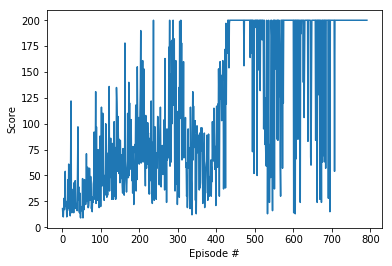

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## My Big Idea
---
Is to change this problem into a classification problem and then solve it with using supervised learning technique.

In [122]:
class Policy(nn.Module):
    def __init__(self, s_size=4, h_size=16, a_size=2):
        super().__init__()
        self.fc1 = nn.Linear(s_size,h_size)
        self.fc2 = nn.Linear(h_size,8)
        self.fc3 = nn.Linear(8,a_size)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.softmax(x,dim=1)
    
    def act(self,state):
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        probs =self.forward(state).cpu()
        #m = Categorical(probs)
        #action = m.sample()
        action = np.argmax(probs.detach().numpy())
        return action,probs

In [229]:
policy = Policy().to(device)
optimizer = optim.Adam(policy.parameters(),lr=0.002)
criterion = nn.MSELoss()


def reinforce(n_episodes=10000, max_t=100, gamma=1.0, print_every=100):
    scores_deque = deque(maxlen=100)
    scores = []
    time_trainer = 10
    
    for i_episode in range(1,n_episodes+1):
        saved_action = []
        rewards = []
        state = env.reset()
        for t in range(max_t):
            action,prob= policy.act(state)
#             print(prob)
#             print(action)
            saved_action.append((action,prob))
            state,reward,done,_ = env.step(action)
            rewards.append(reward* (gamma**t))
            if done:
                ts = t
#                 print(t)
                break
                
        time_space = ts
        #print(ts)
        #time_trainer+=5
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        #R = sum(rewards)
        
        policy_loss = []
#         print(time_space)
#         print(time_trainer,time_space)
    
        for action,prob in saved_action:
            if time_trainer <= time_space:
                with torch.no_grad():
                    temp = torch.tensor(prob,requires_grad=False)
                    label = temp
                    label[0][action] = 1.0
                loss = criterion(-prob,label)
                
#                 time_trainer = max(time_trainer+10,time_space)
            else:
#                 print(0)
                with torch.no_grad():
                    temp = torch.tensor(prob,requires_grad=False)
                    label = temp
                    label[0][action] = 0.0
                loss = criterion(prob,label)
#                 time_trainer = time_space
            policy_loss.append(loss)
        policy_loss = sum(policy_loss)
        time_trainer = time_trainer+4
        
        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()
        
        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            break
        
    return scores
scores = reinforce()

Episode 100	Average Score: 24.56
Episode 200	Average Score: 21.08
Episode 300	Average Score: 19.99
Episode 400	Average Score: 21.02
Episode 500	Average Score: 20.93
Episode 600	Average Score: 20.79
Episode 700	Average Score: 20.79
Episode 800	Average Score: 18.25
Episode 900	Average Score: 17.99
Episode 1000	Average Score: 16.95
Episode 1100	Average Score: 17.13
Episode 1200	Average Score: 15.65
Episode 1300	Average Score: 16.14
Episode 1400	Average Score: 16.69
Episode 1500	Average Score: 16.69
Episode 1600	Average Score: 15.36
Episode 1700	Average Score: 15.90
Episode 1800	Average Score: 16.10
Episode 1900	Average Score: 16.93
Episode 2000	Average Score: 17.66
Episode 2100	Average Score: 16.01
Episode 2200	Average Score: 15.62
Episode 2300	Average Score: 16.28
Episode 2400	Average Score: 17.34
Episode 2500	Average Score: 17.25
Episode 2600	Average Score: 16.90
Episode 2700	Average Score: 17.02
Episode 2800	Average Score: 17.50
Episode 2900	Average Score: 17.98
Episode 3000	Average Sc

## What's Next?

In this lesson, we've learned all about the __REINFORCE__ algorithm, which was illustrated with a toy environment with a **discrete** action space. But it's also important to mention that REINFORCE can also be used to solve environment with continuous action spaces!

For an environment wiht a continuous action space, the corresponding policy network could have an output layer that parameterizes a **continuous probability distribution**.

For instance, assume the output layer returns the mean $\mu$ and variance $\sigma^2$ of a **normal distribution**.

Then in order to select an action, the agent needs only to pass the most recent state $s_t$ as input to the network, and then use the output mean $\mu$ and variance $\sigma^2$ to sample from the distribution $a_t - N(\mu,\sigma^2)$

This should work in theory, but it's unlikely to perform well in practice! To improve performance with continuous action spaces, we'll have to make some small modification to the REINFORCE algorithm, and we'll learn more about these modification in the upcoming lessons.

# Summary

## What are Policy Gradient Methods?
***
   - **Policy-based methods** are a class of algorithm that search directly for the optimal policy, without simultaneously maintaining value function estimation.
   - **Policy gradient methods** are a subclass of policy based methods that estimate the weights of an optimal policy through gradient ascent.
   - In this lesson, we represent the policy with a neural network, where our goal is to find the weights $\theta$ of the network that maximize expected return.
   
   
## The Big Picture
***
* The policy gradient method will iteratively amend the policy network weights to:
    * make (state, action) pairs that resulted in positive return more likely, and
    * make (state, action) pairs that result in negative return less likely.
    
## Problem Setup
***
* A **trajectory** $\tau$ is state-action sequence $s_0,a_,0....s_H,a_H,s_{H+1}$.
* In this lesson, we will use the notation $R(\tau)$ to refer to the return corresponding to trajectory $\tau$.
* Our goal is to find the weight $\theta$ of the policy network to maximize the **expected** return $U(\theta) := \sum_{\tau}P(\tau;\theta)R(\tau)$

## REINFORCE
***
* The pseudocode for REINFORCE is as follows:
    1. Use the policy $\pi_\theta$ to collect $m$ trajectories $\{\tau^{1},\tau^{2}...,\tau^{m}\}$ with horizon H. We refer to the $i$-th trajectory as
        * $\tau^{i} = s_0^{i},a_0^{i},....s_H^{i},a_H^{i},s_{H+1}^{i}$
     2. Use the trajectories to estimate the gradient $
     \delta_{\theta}U(\theta)=g^{'}:=\frac{1}{m}\sum_{i=1}^{m} \sum_{t=0}^{H}\delta_{\theta}\log\pi_\theta(a_t^{i}|s_t^{i})R(\tau^{i})$
     3. Update the weights of the policy:
         * $\theta \gets \theta + \alpha g^{'}$
     4. Loop over steps 1-3
     
## Derivation
***
* We derived the **likelihood ration policy gradient**:
    * $\delta_{\theta}U(\theta) = \sum_{\tau}P(\tau;\theta)\delta_{\theta}\log P(\tau;\theta)R(\theta)$
* We can approximate the gradient above with a sample-weighted average:
    * $\delta_{\theta}U(\theta) = \frac{1}{m}\sum_{i=1}^{m}\delta_{\theta}\log P(\tau^{(i)};\theta)R(\tau^{(i)})$
* We can calculate the following:
    * $\delta_{\theta}\log P(\tau^{(i)};\theta) = \sum_{t=0}^{H}\delta_{\theta}\log\pi_\theta (a_t^{(i)}|s_t^{(i)})$

## What's Next?
***
* Reinforce can solve Markov Decision Processe (MDPs) with either discrete or continuous action space.